# Inteligentna analyza udajov
## Dataset c. 20
## Bettina Pinkeova - 50%, Daniel Kavuliak - 50%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

# Vseobecne informacie o datasete personal_train

In [2]:
personal = pd.read_csv('personal_train.csv')

personal.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",32,Female,1987/07/22
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",55,Male,1963-10-27
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",62,Male,1957-10-05
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",47,Male,1972-06-29
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",52,Female,1967-08-15


Dataset ma 3933 zaznamov a 6 stlpcov

In [3]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
Unnamed: 0       3933 non-null int64
name             3933 non-null object
address          3933 non-null object
age              3933 non-null int64
sex              3933 non-null object
date_of_birth    3933 non-null object
dtypes: int64(2), object(4)
memory usage: 184.4+ KB


In [4]:
personal.describe(include='all')

,Unnamed: 0,name,address,age,sex,date_of_birth
count,3933.000000,3933,3933,3933.000000,3933,3933
unique,NaN,3933,3933,NaN,2,3725
top,NaN,Michael Mandato,"642 Williams Pines Apt. 334\r\nPowellland, NV ...",NaN,Male,1980-10-22
freq,NaN,1,1,NaN,2620,4
mean,1966.000000,NaN,NaN,51.816934,NaN,NaN
std,1135.503633,NaN,NaN,11.814803,NaN,NaN
min,0.000000,NaN,NaN,-1.000000,NaN,NaN
25%,983.000000,NaN,NaN,44.000000,NaN,NaN
50%,1966.000000,NaN,NaN,52.000000,NaN,NaN
75%,2949.000000,NaN,NaN,60.000000,NaN,NaN


# Popis chyb a uprava stlpcov v datasete personal_train
<ul>
    <li>unnamed:0 moze sluzit ako index alebo sa moze zmazat</li>
    <li>address (spojity) ma dva delimitre '\r\n' a ', ', treba nastavit iba jeden delimiter a nasledne podla neho rozdelit do stlpcov</li>
</ul>

In [5]:
personal = pd.read_csv('personal_train.csv', index_col=0)

personal['address'] = personal['address'].str.replace('\r\n', ', ')
personal[['street', 'city', 'postal_code']] = personal.address.str.split(', ', expand=True)
personal = personal.drop(columns='address')
personal.loc[personal['postal_code'].isnull(), 'postal_code'] = personal.loc[personal['postal_code'].isnull(), 'city']
personal.loc[personal['postal_code'] == personal['city'], 'city'] = np.nan
personal.head()

,name,age,sex,date_of_birth,street,city,postal_code
0,Roscoe Bohannon,32,Female,1987/07/22,7183 Osborne Ways Apt. 651,East Andrew,OH 53211
1,Ernest Kline,55,Male,1963-10-27,391 Ball Road Suite 961,Flowersborough,IN 57550
2,Harold Hendriks,62,Male,1957-10-05,8702 Vincent Square,New Jerryfurt,CO 30614
3,Randy Baptiste,47,Male,1972-06-29,2751 Harris Crossroad,West Ashley,CA 30311
4,Anthony Colucci,52,Female,1967-08-15,904 Robert Cliffs Suite 186,West Kyle,CO 77139


Po rozdeleni adresy vznikli NaN hodnoty v stlpci 'city'. Kedze su to MNAR hodnoty, nevieme ich opravit, ale kedze s nimi nepracujeme mozeme ich ponechat.

In [6]:
personal[personal['city'].isnull()].head()

,name,age,sex,date_of_birth,street,city,postal_code
21,Jeffrey Taylor,58,Female,1961-04-05,USNV Kim,NaN,FPO AA 96043
39,Todd Pagel,42,Male,1977-06-22,Unit 3142 Box 1661,NaN,DPO AE 50179
44,Michael Hintz,65,Male,1953/12/11,Unit 2178 Box 4941,NaN,DPO AP 69245
50,Sean Ferguson,48,Male,1971-04-17,USNV Castro,NaN,FPO AP 71247
84,Darryl Bokor,62,Male,1957-10-18 00:00:00,USNV Robinson,NaN,FPO AP 96068


<ul>
<li>v stlpci date_of_birth (spojity) sa nachadzaju datumy v rozlicnych formatoch (skrateny rok, cas polnoci)</li>
<li>treba upravit na jeden format a cely stlpec pretypovat na datetime (moze tam byt prehodeny den s mesiacom, namiesto pomlcky sa nachadza lomitko)</li>
</ul>

In [7]:
personal['date_of_birth'].values

array(['1987/07/22', '1963-10-27', '1957-10-05', ..., '1954-11-14',
       '65-02-13', '1956-07-09'], dtype=object)

In [8]:
personal['date_of_birth'].unique()

array(['1987/07/22', '1963-10-27', '1957-10-05', ..., '1954-11-14',
       '65-02-13', '1956-07-09'], dtype=object)

In [9]:
personal[personal['date_of_birth'].str.len() < 10]

,name,age,sex,date_of_birth,street,city,postal_code
35,Elmer King,27,Male,92-05-27,29688 Lindsey Dale Suite 077,North Cassandra,PA 31881
45,Steve Hawkins,78,Male,41-10-15,362 Charles Inlet Apt. 184,Ingramchester,IN 56876
61,Gordon Dunn,49,Female,70-05-06,868 Tony Bridge Apt. 297,New Natalieview,FL 18508
85,Doug Jackson,50,Male,69-09-11,89329 Sanchez Isle Suite 166,Howetown,NE 36157
91,Robert Killinger,68,Male,51-06-16,09437 Diana Ford Apt. 873,Delgadoside,AK 71380
93,Melvin Wiggins,46,Female,72-11-25,40153 Smith Shoals Apt. 459,Gonzalezshire,SD 60813
102,James Olsen,50,Male,69-08-23,768 Brett Keys Suite 702,South Tarashire,ID 11442
116,Eduardo Paci,60,Male,59-09-03,7245 Harper Fields Apt. 575,North Thomasshire,RI 44779
132,Hans Sackett,61,Female,58-07-25,05091 Mary Circles,Veronicafort,ND 49693
161,Kevin Conklin,59,Male,60-01-30,28436 Campbell Bridge Suite 836,South Andrewfurt,MT 12967


In [10]:
personal.loc[personal['date_of_birth'].str.len() < 10, 'date_of_birth'] = '19' + personal.loc[personal['date_of_birth'].str.len() < 10, 'date_of_birth']

In [11]:
personal[personal['date_of_birth'].str.len() > 10]

,name,age,sex,date_of_birth,street,city,postal_code
5,Ronald Lange,47,Female,1971-12-23 00 00 00,30973 Martinez Shores,Jameston,CA 70245
16,Chauncey Suarez,55,Male,1963-10-29 00 00 00,481 Wilson Prairie,Kimberlymouth,LA 20064
24,Thaddeus Mackerl,57,Male,1962-07-29 00 00 00,8122 Jessica Knolls Apt. 880,Dakotafurt,WV 62098
28,Harold Odowd,58,Male,1961-09-09 00 00 00,7842 Curtis Vista Apt. 188,Lake Samuelburgh,GA 55767
33,William Morago,51,Male,1968-09-06 00 00 00,609 Matthew Causeway Apt. 234,Lake Victoriamouth,KY 04432
36,Edgar Holbrook,44,Male,1975-10-06 00:00:00,902 Figueroa Fields Suite 708,Davishaven,OK 14930
42,Nicolas Sardina,57,Male,1962-05-08 00 00 00,8054 Bryce Shoal,Amyfort,SC 57887
56,Keith Loy,58,Female,1961-04-30 00:00:00,46552 Sullivan Street,Whiteville,OR 51827
59,Michael Outlaw,53,Female,1966-08-14 00:00:00,735 Valerie Hill,Websterfort,AZ 79829
72,Patrick Jacobs,58,Female,1961-02-16 00:00:00,0837 Patrick Highway Suite 797,Port Jacquelinefort,MS 46400


In [12]:
personal.loc[personal['date_of_birth'].str.len() > 10, 'date_of_birth'] = personal.loc[personal['date_of_birth'].str.len() > 10, 'date_of_birth'].apply(lambda x: x[:10])
personal['date_of_birth'] = pd.to_datetime(personal.date_of_birth)

personal.head()

,name,age,sex,date_of_birth,street,city,postal_code
0,Roscoe Bohannon,32,Female,1987-07-22,7183 Osborne Ways Apt. 651,East Andrew,OH 53211
1,Ernest Kline,55,Male,1963-10-27,391 Ball Road Suite 961,Flowersborough,IN 57550
2,Harold Hendriks,62,Male,1957-10-05,8702 Vincent Square,New Jerryfurt,CO 30614
3,Randy Baptiste,47,Male,1972-06-29,2751 Harris Crossroad,West Ashley,CA 30311
4,Anthony Colucci,52,Female,1967-08-15,904 Robert Cliffs Suite 186,West Kyle,CO 77139


<ul>
    <li>v stlpci sex (kategoricky) sa nachadzaju medzery za nazvom pohlavia</li>
</ul>

In [13]:
personal['sex'].values

array([' Female', ' Male', ' Male', ..., ' Male', ' Female', ' Male'],
      dtype=object)

In [14]:
personal['sex'] = personal['sex'].str.strip()

<ul>
    <li>v stplci age (spojity) mame vychylene hodnoty</li>
</ul>

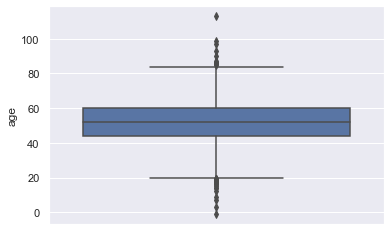

In [15]:
sns.boxplot(personal['age'], orient='v')

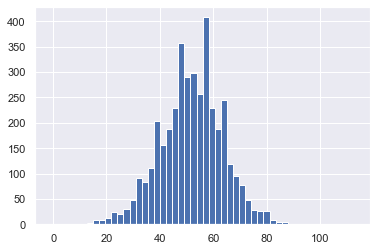

In [16]:
personal['age'].hist(bins=50)

# Vseobecne informacie o datasete other_train

In [17]:
other = pd.read_csv('other_train.csv')

other.head()

,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,...,kurtosis_glucose,personal_info,education,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss
0,0,George Kidd,"481 Jenkins Branch Suite 358\r\nSolistown, FL ...",5.991010,FALSE,13.0,Own-child,5.185332,90.367188,30.878848,...,1.553546,Craft-repair|United-States\r\r\nNever-married ...,Bachelors,208725.0,1.0,36.785670,<=50K,5.619565,40.0,0.0
1,1,Tommy Prince,"123 Sullivan Loaf\r\nCynthiaview, RI 22106",2.124187,f,-1300.0,Husband,-0.521835,120.882812,62.780618,...,-0.218017,Exec-managerial|United-States\r\r\nMarried-civ...,Bachelors,212894.0,0.0,50.311160,>50K,30.332776,50.0,0.0
2,2,Ivan Lane,"509 Harris Hill\r\nSouth Jean, IN 15542",22.432206,f,9.0,Own-child,0.751713,166.554688,9.733834,...,-1.251604,Adm-clerical|United-States\r\r\nNever-married ...,HS-grad,410439.0,0.0,58.506518,<=50K,0.564381,25.0,0.0
3,3,Mack Sanchez,"8651 Destiny Shoal Suite 194\r\nCodybury, HI 2...",11.077929,FALSE,13.0,Not-in-family,-0.029883,125.023438,17.771415,...,-0.084789,Handlers-cleaners|Haiti\r\r\nNever-married -- ...,Bachelors,196899.0,0.0,47.344724,<=50K,1.683946,50.0,0.0
4,4,Francis Siebert,"982 Douglas Lights\r\nStewartfort, WY 59574",1.103161,f,11.0,Unmarried,15.720257,30.859375,64.290446,...,3.897922,Other-service|Columbia\r\r\nDivorced -- Privat...,Assoc-voc,264166.0,1.0,39.683264,<=50K,70.271739,45.0,0.0


Dataset ma 3983 zaznamov a 22 stlpcov

In [18]:
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 22 columns):
Unnamed: 0          3983 non-null int64
name                3983 non-null object
address             3983 non-null object
kurtosis_oxygen     3971 non-null float64
pregnant            3976 non-null object
education-num       3970 non-null float64
relationship        3970 non-null object
skewness_glucose    3976 non-null float64
mean_glucose        3969 non-null float64
std_oxygen          3971 non-null float64
capital-gain        3971 non-null float64
skewness_oxygen     3968 non-null float64
kurtosis_glucose    3963 non-null float64
personal_info       3962 non-null object
education           3968 non-null object
fnlwgt              3969 non-null float64
class               3970 non-null float64
std_glucose         3570 non-null float64
income              3968 non-null object
mean_oxygen         3967 non-null float64
hours-per-week      3969 non-null float64
capital-loss        

In [19]:
other.describe()

,Unnamed: 0,kurtosis_oxygen,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,mean_oxygen,hours-per-week,capital-loss
count,3983.00000,3971.000000,3970.000000,3976.000000,3969.000000,3971.000000,3971.000000,3968.000000,3963.000000,3969.000000,3970.000000,3570.000000,3967.000000,3969.000000,3962.000000
mean,1991.00000,7.400869,6.781360,4.211511,101.258045,31.195602,1243.528582,91.071965,0.953017,190751.141345,0.255919,45.176450,18.465360,40.567649,77.913428
std,1149.93739,4.806639,329.405059,9.662451,33.565751,22.299646,8289.777675,108.231320,1.612807,103232.011678,0.436432,7.597554,34.759256,12.485153,381.430180
min,0.00000,-2.597872,-1600.000000,-1.755332,6.187500,7.370432,0.000000,-1.976976,-1.641515,20057.000000,0.000000,25.695250,0.213211,1.000000,0.000000
25%,995.50000,3.620564,9.000000,-0.119501,87.679688,15.067457,0.000000,12.830509,0.071856,118793.000000,0.000000,40.128532,2.069398,40.000000,0.000000
50%,1991.00000,7.781618,10.000000,0.373534,110.664062,20.594663,0.000000,68.348245,0.310372,179446.000000,0.000000,45.887636,3.232441,40.000000,0.000000
75%,2986.50000,10.258291,13.000000,2.079975,124.132812,43.413967,0.000000,126.739807,0.781066,239074.000000,1.000000,50.374317,12.656773,45.000000,0.000000
max,3982.00000,34.539844,1600.000000,68.101622,189.734375,110.642211,99999.000000,1191.000837,8.069522,972354.000000,1.000000,91.206475,217.371238,99.000000,4356.000000


In [20]:
categorical = other.dtypes[other.dtypes == "object"].index
other[categorical].describe()

,name,address,pregnant,relationship,personal_info,education,income
count,3983,3983,3976,3970,3962,3968,3968
unique,3933,3933,6,6,985,16,2
top,Robert Mallard,"14861 Steven Vista\r\nEast Anthonyfurt, ME 51688",f,Husband,Craft-repair|United-States\r\r\nMarried-civ-sp...,HS-grad,<=50K
freq,2,2,3521,1602,147,1296,2993


# Popis chyb a uprava stlpcov v datasete other_train

<ul>
    <li>stlpec unnamed:0 treba pouzit ako index</li>
</ul>

In [21]:
other = pd.read_csv('other_train.csv', index_col=0)

other.head()

,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,capital-gain,...,kurtosis_glucose,personal_info,education,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss
0,George Kidd,"481 Jenkins Branch Suite 358\r\nSolistown, FL ...",5.991010,FALSE,13.0,Own-child,5.185332,90.367188,30.878848,0.0,...,1.553546,Craft-repair|United-States\r\r\nNever-married ...,Bachelors,208725.0,1.0,36.785670,<=50K,5.619565,40.0,0.0
1,Tommy Prince,"123 Sullivan Loaf\r\nCynthiaview, RI 22106",2.124187,f,-1300.0,Husband,-0.521835,120.882812,62.780618,15024.0,...,-0.218017,Exec-managerial|United-States\r\r\nMarried-civ...,Bachelors,212894.0,0.0,50.311160,>50K,30.332776,50.0,0.0
2,Ivan Lane,"509 Harris Hill\r\nSouth Jean, IN 15542",22.432206,f,9.0,Own-child,0.751713,166.554688,9.733834,0.0,...,-1.251604,Adm-clerical|United-States\r\r\nNever-married ...,HS-grad,410439.0,0.0,58.506518,<=50K,0.564381,25.0,0.0
3,Mack Sanchez,"8651 Destiny Shoal Suite 194\r\nCodybury, HI 2...",11.077929,FALSE,13.0,Not-in-family,-0.029883,125.023438,17.771415,0.0,...,-0.084789,Handlers-cleaners|Haiti\r\r\nNever-married -- ...,Bachelors,196899.0,0.0,47.344724,<=50K,1.683946,50.0,0.0
4,Francis Siebert,"982 Douglas Lights\r\nStewartfort, WY 59574",1.103161,f,11.0,Unmarried,15.720257,30.859375,64.290446,0.0,...,3.897922,Other-service|Columbia\r\r\nDivorced -- Privat...,Assoc-voc,264166.0,1.0,39.683264,<=50K,70.271739,45.0,0.0


<ul>
    <li>v stlpci pregnant (kategoricky) nie je jednoznacny format (za False sa pouziva 'f', 'F', 'FALSE' a za True sa pouziva 't', 'T', 'TRUE')</li>
    <li>treba nahradit boolovskymi hodnotami, NaN hodnoty nahradime najfrekventovanejsou hodnotou</li>
</ul>

In [22]:
other['pregnant'].unique()

array(['FALSE', 'f', 't', 'F', nan, 'TRUE', 'T'], dtype=object)

In [23]:
pregnant = {'FALSE': False, 'f': False, 'F': False, 'TRUE': True, 'T': True, 't': True}
other = other.replace({'pregnant': pregnant})

<ul>
    <li>v stlpci address (spojity) su pouzite viacere delimitre, treba to dat na jeden</li>
    <li>to iste osetrit aj v stlpci personal_info (spojity)</li>
    <li>obidva stlpce rozdelit na viacere podla delimitra
</ul>

In [24]:
other['address'] = other['address'].str.replace('\r\n', ', ')
other[['street', 'city', 'postal_code']] = other['address'].str.split(', ', expand=True)
other.loc[other['postal_code'].isnull(), 'postal_code'] = other.loc[other['postal_code'].isnull(), 'city']
other.loc[other['postal_code'] == other['city'], 'city'] = np.nan
other = other.drop(columns='address')

In [25]:
other.personal_info = other.personal_info.str.replace('|', ',')
other.personal_info = other.personal_info.str.replace(' -- ', ',')
other.personal_info = other.personal_info.str.replace('\r\r\n', ',')
other[['job', 'country', 'status', 'employment','race']] = other.personal_info.str.split(',', expand=True)
other = other.drop(columns='personal_info')

<ul>
    <li>v stlpcoch job, country, employment a race (kategoricky) sa nachadzaju otazniky alebo retazec 'nan'</li>
    <li>treba ich nahradit NaN hodnotami a tie osetrime najfrekventovanejsou hodnotou</li>
</ul>

In [26]:
other.loc[other['job'] == '?', 'job'] = np.nan

In [27]:
other.loc[other['country'] == '?', 'country'] = np.nan

In [28]:
other.loc[other['employment'] == '?', 'employment'] = np.nan

In [29]:
other.loc[other['race'] == '??', 'race'] = np.nan
other.loc[other['race'] == 'nan', 'race'] = np.nan

<ul>
    <li>v stlpci job mame duplicitne hodnoty (napr. Adm-clerical a Adm_clerical)</li>
    <li>treba nahradit pomlcku podtrznikom</li>
</ul>

In [30]:
other['job'].unique()

array(['Craft-repair', 'Exec-managerial', 'Adm-clerical',
       'Handlers-cleaners', 'Other-service', 'Machine-op-inspct',
       'Farming-fishing', 'Transport-moving', 'Other_service', 'Sales',
       'Prof-specialty', 'Exec_managerial', 'Tech_support',
       'Tech-support', 'Adm_clerical', 'Prof_specialty', 'Craft_repair',
       nan, 'Protective-serv', 'Handlers_cleaners', 'Priv-house-serv',
       'Machine_op_inspct', 'Transport_moving', 'Protective_serv',
       'Farming_fishing', 'Priv_house_serv', 'Armed-Forces'], dtype=object)

In [31]:
other['job'] = other['job'].str.replace('-', '_')
other['job'].unique()

array(['Craft_repair', 'Exec_managerial', 'Adm_clerical',
       'Handlers_cleaners', 'Other_service', 'Machine_op_inspct',
       'Farming_fishing', 'Transport_moving', 'Sales', 'Prof_specialty',
       'Tech_support', nan, 'Protective_serv', 'Priv_house_serv',
       'Armed_Forces'], dtype=object)

<ul>
    <li>stlpec education-num je zbytocny, kedze mame stlpec education</li>
</ul>

In [32]:
other = other.drop(columns='education-num')

<ul>
    <li>v stlpcoch education, relationship, income (kategoricky) sa nachadzaju medzery pred retazcom, treba to odstranit</li>
    <li>capital-gain, capital-loss a fnlwgt (spojity) nesuvisia s meranim cukrovky - vyhodime sme ich</li>
</ul>

In [33]:
other['education'].unique()

array([' Bachelors', ' HS-grad', ' Assoc-voc', ' Some-college', ' 12th',
       ' 11th', ' Masters', ' 10th', ' Assoc-acdm', ' 7th-8th',
       ' 1st-4th', ' 9th', ' 5th-6th', ' Doctorate', ' Prof-school', nan,
       ' Preschool'], dtype=object)

In [34]:
other['education'] = other['education'].str.strip()

In [35]:
other['education'].unique()

array(['Bachelors', 'HS-grad', 'Assoc-voc', 'Some-college', '12th',
       '11th', 'Masters', '10th', 'Assoc-acdm', '7th-8th', '1st-4th',
       '9th', '5th-6th', 'Doctorate', 'Prof-school', nan, 'Preschool'],
      dtype=object)

In [36]:
other['relationship'].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative', nan], dtype=object)

In [37]:
other['relationship'] = other['relationship'].str.strip()

In [38]:
other = other.drop(columns=['capital-gain', 'capital-loss', 'fnlwgt'])

In [39]:
other['income'].unique()

array([' <=50K', ' >50K', nan], dtype=object)

In [40]:
other['income'] = other['income'].str.strip()

<ul>
    <li>v stlpcoch 'kurtosis_oxygen', 'std_oxygen' (spojite) mame vychylene hodnoty</li>
    <li>budeme ich normalizovat hranicnymi hodnotami rozdelenia</li>
    <li>v stlpcoch 'mean_oxygen', 'skewness_oxygen', 'skewness_glucose', 'mean_glucose', 'kurtosis_oxygen' (spojite) mame tiez vychylene hodnoty, tieto atributy budeme transformovat pomocou logaritmu</li>
    <li>v stlpci 'std_glucose' (spojity) vymazeme vychylene hodnoty a vsetky NaN hodnoty nahradime medianom</li>
</ul>

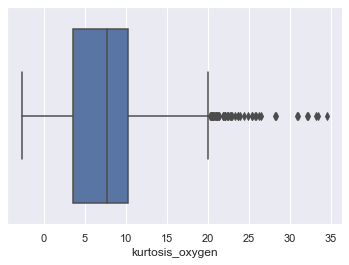

In [41]:
sns.boxplot(other['kurtosis_oxygen'])

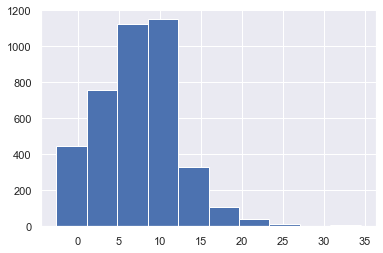

In [42]:
other['kurtosis_oxygen'].hist()

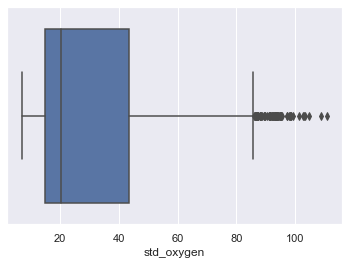

In [43]:
sns.boxplot(other['std_oxygen'])

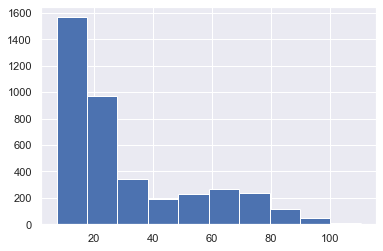

In [44]:
other['std_oxygen'].hist()

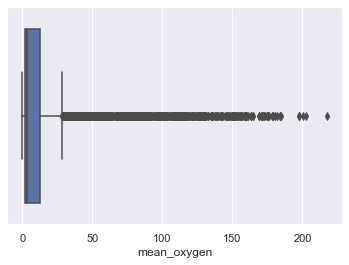

In [45]:
sns.boxplot(other['mean_oxygen'])

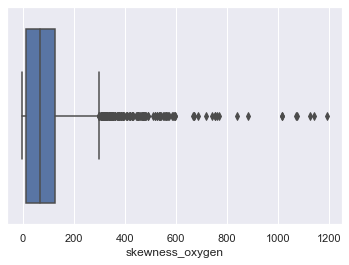

In [46]:
sns.boxplot(other['skewness_oxygen'])

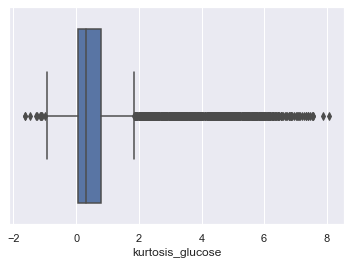

In [47]:
sns.boxplot(other['kurtosis_glucose'])

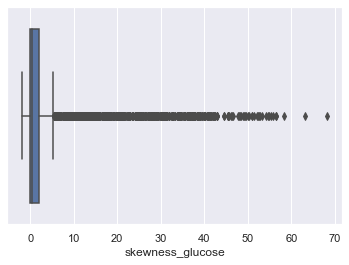

In [48]:
sns.boxplot(other['skewness_glucose'])

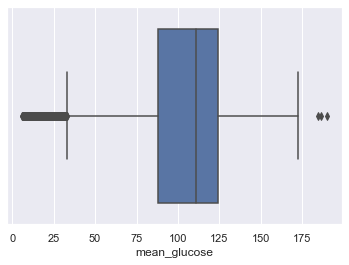

In [49]:
sns.boxplot(other['mean_glucose'])

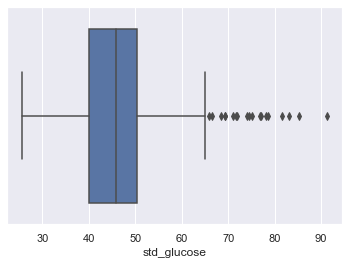

In [50]:
sns.boxplot(other['std_glucose'])

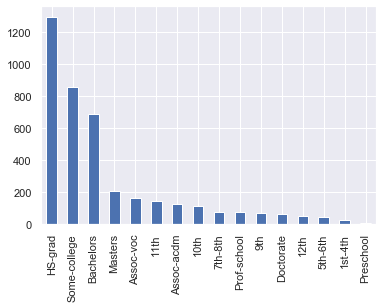

In [51]:
other['education'].value_counts().plot.bar()

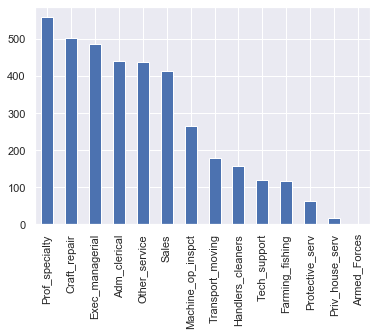

In [52]:
other['job'].value_counts().plot.bar()

# Parova analyza
<ul>
    <li>analyzujeme atributy 'std_oxygen' a 'education'</li>
    <li>z grafu mozeme vycitat, ze je signifikantny rozdiel medzi skolkarmi a doktorandmi</li>
</ul>

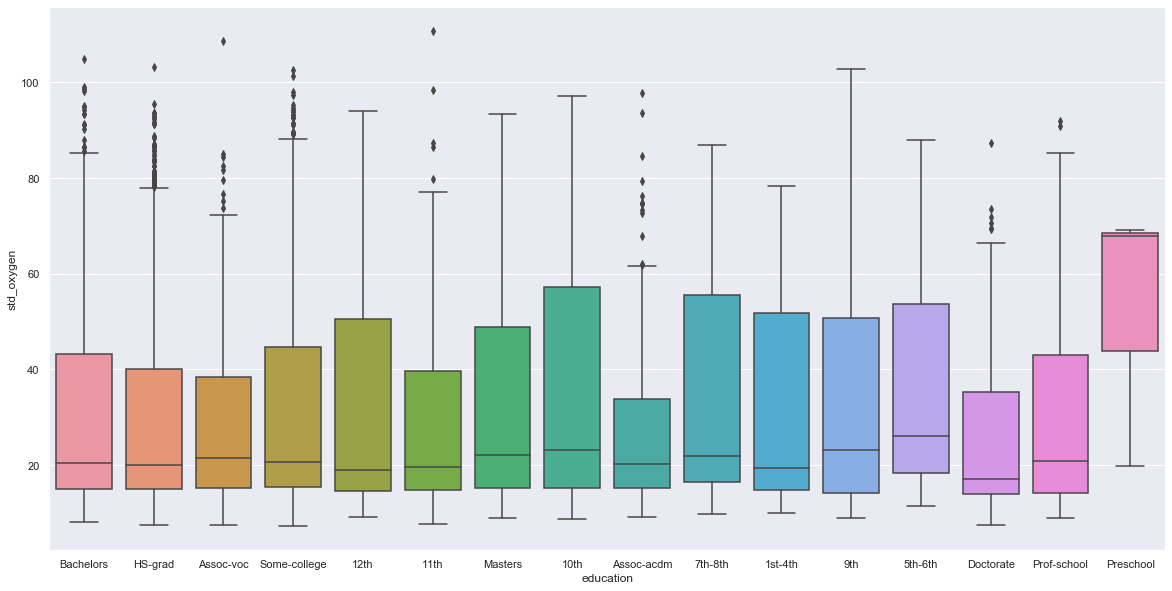

In [53]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=other, x='education', y='std_oxygen')

<ul>
    <li>analyzujeme atributy 'job' a 'kurtosis_glucose'</li>
    <li>z grafu mozeme vycitat, ze je viditelny rozdiel medzi 'Farming_fishing' a 'Adm_clerical'</li>
</ul>

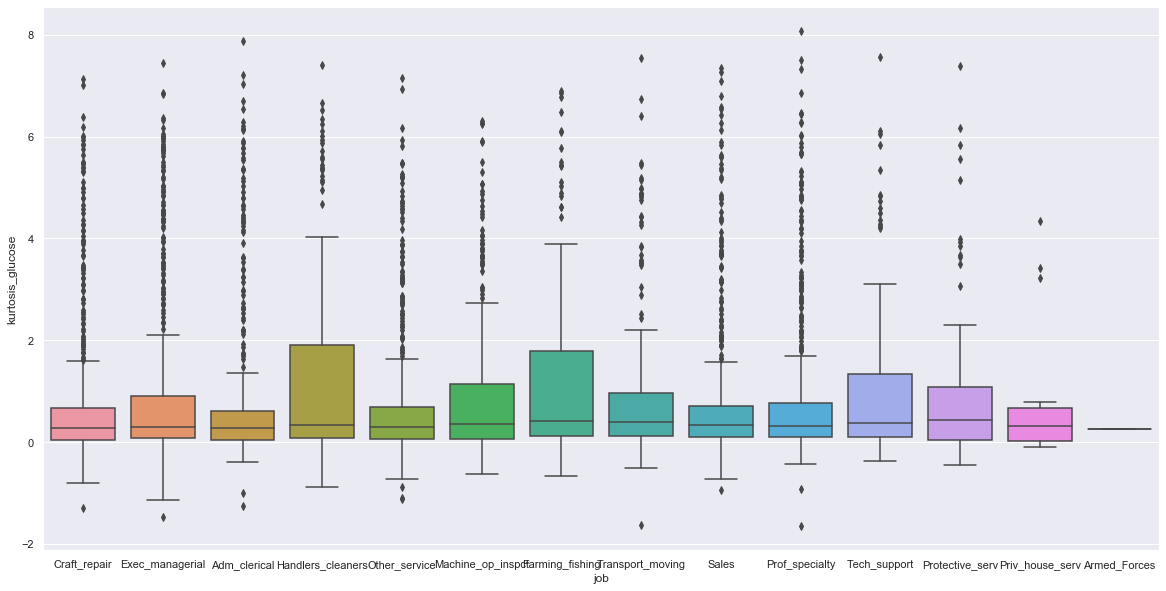

In [54]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=other, x='job', y='kurtosis_glucose')

# Formulacia a statisticke overenie hypotez

 ## 1. hypoteza

Nulova hypoteza - Skolkari nemaju vyssie standardne odchylky kyslika ako doktorandi.

Alternativna hypoteza - Skolkari maju vyssie standardne odchylky kyslika ako doktorandi.

In [55]:
preschool = other.loc[other['education'] == 'Preschool', 'std_oxygen']
doctorate = other.loc[other['education'] == 'Doctorate', 'std_oxygen']

<ul>
    <li>z grafov vieme vycitat, ze hodnoty nie su z normalneho rozdelenia</li>
</ul>

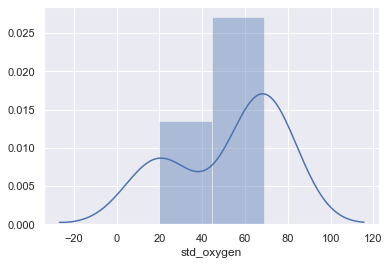

In [56]:
sns.distplot(preschool)

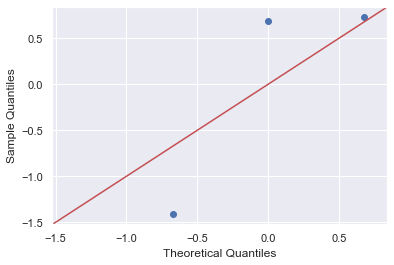

In [57]:
_ = sm.ProbPlot(preschool, fit=True).qqplot(line='45')

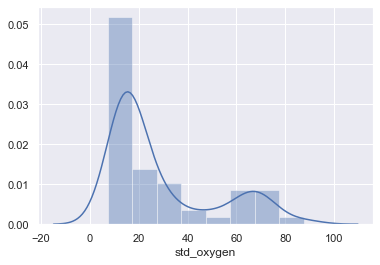

In [58]:
sns.distplot(doctorate)

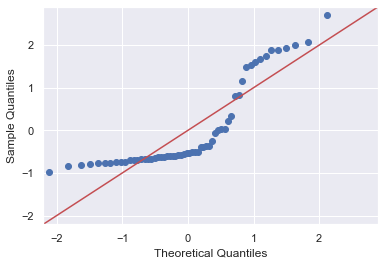

In [59]:
_ = sm.ProbPlot(doctorate, fit=True).qqplot(line='45')

<ul>
    <li>Shapirov-Wilkov test potvrdzuje, ze data skolkarov nepochadzaju z normalneho rozdelenia, zato data doktorandov pochadza z normalneho rozdelenia</li>
    <li>Levenov test nam ukazuje, ze data pochadzaju z distribucii s roznou varianciou</li>
    <li>rozhodli sme sa pre Mann-Witneyho U test a ten nam potvrdil alternativnu hypotezu</li>
</ul>

In [60]:
stats.shapiro(doctorate)

(0.7558702826499939, 1.859040388296762e-08)

In [61]:
stats.shapiro(preschool)

(0.7679501175880432, 0.040082044899463654)

In [62]:
stats.levene(doctorate, preschool)

LeveneResult(statistic=0.016126709593721544, pvalue=0.8993793494550046)

In [63]:
stats.mannwhitneyu(x=doctorate, y=preschool)

MannwhitneyuResult(statistic=37.0, pvalue=0.04937548932385397)

### 2. hypoteza

Nulova hypoteza - farmari a rybari nemaju vyssi koeficient spicatosti glukozy ako ludia z administrativy

Alternativna hypoteza - farmari a rybari maju vyssi koeficient spicatosti glukozy ako ludia z administrativy

In [64]:
farmers_fishers = other.loc[other['job'] == 'Farming_fishing', 'kurtosis_glucose']
administrative = other.loc[other['job'] == 'Adm_clerical', 'kurtosis_glucose']

<ul>
    <li>z grafov mozeme vycitat, ze hodnoty nepochadzaju z normalneho rozdelenia</li>
</ul>

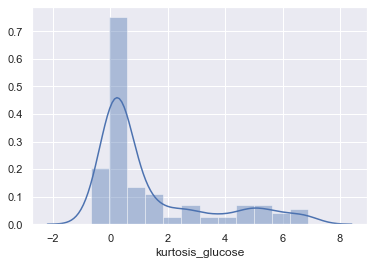

In [65]:
sns.distplot(farmers_fishers)

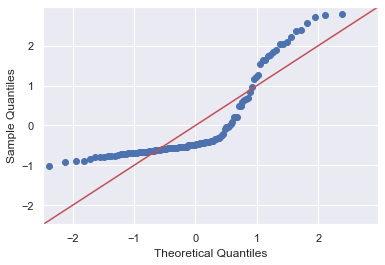

In [66]:
_ = sm.ProbPlot(farmers_fishers, fit=True).qqplot(line='45')

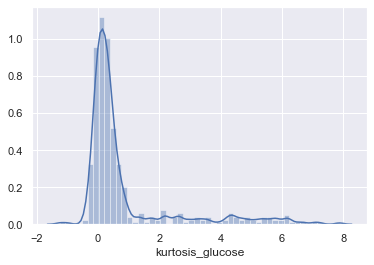

In [67]:
sns.distplot(administrative)

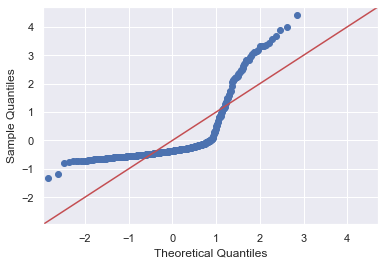

In [68]:
_ = sm.ProbPlot(administrative, fit=True).qqplot(line='45')

<ul>
    <li>Shapirov-Wilkov test ukazuje, ze pochadzaju z normalneho rozdelenia</li>
    <li>Levenov test ukazuje, ze hodnoty pochadzaju z distribucii s rovnakou varianciou</li>
    <li>rozhodli sme sa podla grafu pre Mann-Witney U test, tento test nam potvrdil alternativnu hypotezu</li>
</ul>

In [69]:
stats.shapiro(farmers_fishers)

(0.7468430995941162, 7.390795332511135e-13)

In [70]:
stats.shapiro(administrative)

(0.6262168884277344, 7.81143418053626e-30)

In [71]:
stats.levene(farmers_fishers, administrative)

LeveneResult(statistic=8.038402430880456, pvalue=0.004746529063936582)

In [72]:
stats.mannwhitneyu(x=farmers_fishers, y=administrative)

MannwhitneyuResult(statistic=21147.0, pvalue=0.0020354252992299555)